## SMS Spam Filter Using Multinomial and Multivariate Naive Bayes Model



### 1. Importing and Preprocessing Data

In [4]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate as cvd
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [1]:
uploaded = files.upload()

NameError: name 'files' is not defined

In [56]:
# reading the training data
df = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
# number of SMSes / documents
len(df)

5572

In [58]:
# counting spam and ham instances
ham_spam = df.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [59]:
print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 13%


In [60]:
# mapping labels to 0 and 1
df['label'] = df.Class.map({'ham':0, 'spam':1})

In [61]:
df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [62]:
# we can now drop the column 'Class'
df = df.drop('Class', axis=1)
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [63]:
# convert to X and y
X = df.sms
y = df.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [64]:
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [65]:
X_train.head()

4387    , im .. On the snowboarding trip. I was wonder...
3491    Huh but i got lesson at 4 lei n i was thinkin ...
3216           I want snow. It's just freezing and windy.
3109    Hello hun how ru? Its here by the way. Im good...
1811    Now, whats your house # again ? And do you hav...
Name: sms, dtype: object

In [66]:
y_train.head()

4387    0
3491    0
3216    0
3109    0
1811    0
Name: label, dtype: int64

In [67]:
# vectorizing the sentences; removing stop words
vect = CountVectorizer(stop_words='english')

In [68]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [69]:
# printing the vocabulary
vect.vocabulary_

{'im': 3441,
 'snowboarding': 5933,
 'trip': 6636,
 'wondering': 7134,
 'planning': 4942,
 'befor': 1247,
 'meet': 4203,
 'greet': 3089,
 'kind': 3736,
 'affair': 830,
 'cheers': 1688,
 'huh': 3372,
 'got': 3051,
 'lesson': 3872,
 'lei': 3862,
 'thinkin': 6466,
 'going': 3025,
 'sch': 5613,
 'earlier': 2398,
 'tot': 6595,
 'parkin': 4801,
 'kent': 3709,
 'vale': 6824,
 'want': 6953,
 'snow': 5931,
 'just': 3672,
 'freezing': 2860,
 'windy': 7083,
 'hello': 3239,
 'hun': 3378,
 'ru': 5524,
 'way': 6986,
 'good': 3035,
 'dates': 2080,
 'guy': 3128,
 'met': 4238,
 'walkabout': 6938,
 'far': 2661,
 'soon': 5967,
 'hows': 3352,
 'whats': 7045,
 'house': 3344,
 'beer': 1244,
 '4mths': 521,
 'half': 3149,
 'price': 5101,
 'orange': 4702,
 'line': 3916,
 'rental': 5387,
 'latest': 3818,
 'camera': 1557,
 'phones': 4894,
 'free': 2851,
 'phone': 4890,
 '11mths': 276,
 'mobilesdirect': 4316,
 '08000938767': 56,
 'update': 6772,
 'or2stoptxt': 4701,
 'yar': 7229,
 'wanted': 6955,
 'scold': 5618,


In [70]:
# vocab size
len(vect.vocabulary_.keys())

7293

In [71]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [72]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 830)	1
  (0, 1247)	1
  (0, 1688)	1
  (0, 3089)	1
  (0, 3441)	1
  (0, 3736)	1
  (0, 4203)	1
  (0, 4942)	1
  (0, 5933)	1
  (0, 6636)	1
  (0, 7134)	1
  (1, 2398)	1
  (1, 3025)	1
  (1, 3051)	1
  (1, 3372)	1
  (1, 3709)	1
  (1, 3862)	1
  (1, 3872)	1
  (1, 4801)	1
  (1, 5613)	1
  (1, 6466)	1
  (1, 6595)	1
  (1, 6824)	1
  (2, 2860)	1
  (2, 3672)	1
  :	:
  (4174, 5408)	1
  (4174, 5681)	1
  (4174, 6092)	1
  (4174, 7246)	1
  (4175, 1277)	1
  (4175, 2086)	1
  (4175, 3035)	1
  (4175, 3263)	1
  (4175, 3318)	1
  (4175, 4534)	1
  (4176, 1828)	1
  (4176, 4568)	1
  (4177, 1236)	1
  (4177, 2096)	1
  (4177, 2896)	1
  (4177, 3025)	1
  (4177, 4110)	1
  (4177, 4491)	1
  (4177, 6136)	1
  (4178, 3290)	1
  (4178, 4647)	1
  (4178, 6514)	1
  (4178, 6699)	1
  (4178, 6800)	1
  (4178, 7146)	1


### 2) Building and Cross-Validation of the Model for Multinomial NB

In [96]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

2.1) 5-fold cross-validation results in terms of accuracy.

In [97]:
# training the NB model and making predictions
start = time.time()
mnb = MultinomialNB()
#cross validtion
score1 = cross_val_score(mnb, X_train_transformed,y_train, cv=5, scoring='accuracy')
print("Average Cross Validation Accuracy for 5-Folds using Multinomial Naive Bayes:-",np.mean(score1))


Average Cross Validation Accuracy for 5-Folds using Multinomial Naive Bayes:- 0.9775079506059651


2.2) 10-fold cross-validation results in terms of precision, recall,and F-score

In [98]:
score1 = cvd(mnb, X_train_transformed,y_train, cv=10, scoring=scoring)
print("Average Cross Validation precision for 10-Folds using Multinomial Naive Bayes:-",score1['test_precision'].mean())
print("Average Cross Validation recall for 10-Folds using Multinomial Naive Bayes:-",score1['test_recall'].mean())
print("Average Cross Validation F1 score for 10-Folds using Multinomial Naive Bayes:-",score1['test_f1_score'].mean())
end =time.time()
print("Time taken:-",end-start)

Average Cross Validation precision for 10-Folds using Multinomial Naive Bayes:- 0.8938246352802433
Average Cross Validation recall for 10-Folds using Multinomial Naive Bayes:- 0.9599213551119176
Average Cross Validation F1 score for 10-Folds using Multinomial Naive Bayes:- 0.9253089713967491
Time taken:- 0.1282963752746582


2.3) Training Multinomial NB Model

In [99]:
# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class1 = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba1 = mnb.predict_proba(X_test_transformed)

#time taken for training and cross validation
end =time.time()
print("Time taken:-",end-start)

Time taken:- 0.15954852104187012


In [122]:
y_pred_proba1 

array([[9.99999999e-01, 1.04542272e-09],
       [9.99968215e-01, 3.17847344e-05],
       [9.88816562e-01, 1.11834379e-02],
       ...,
       [9.99998916e-01, 1.08355798e-06],
       [3.28345400e-01, 6.71654600e-01],
       [9.99893544e-01, 1.06456286e-04]])

2.4) Model Evaluation

In [100]:
# printing the overall accuracy
metrics.accuracy_score(y_test, y_pred_class1)

0.9856424982053122

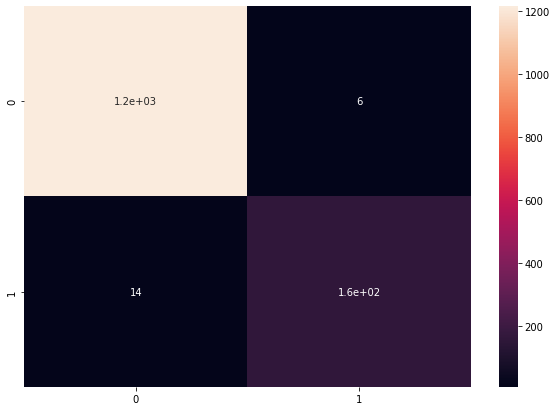

In [101]:
# confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred_class1)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [102]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class1))
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class1))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class1))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class1))

sensitivity 0.9190751445086706
specificity 0.9950819672131147
precision 0.9636363636363636
0.9636363636363636
precision 0.9636363636363636
PRECISION SCORE : 0.9636363636363636
RECALL SCORE : 0.9190751445086706
F1 SCORE : 0.9408284023668639


In [120]:
# creating an ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba1[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [121]:
# area under the curve
print (roc_auc)

0.9877996778167346


In [104]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.335260,0.000000
2,1.000000e+00,0.341040,0.000000
3,1.000000e+00,0.352601,0.000000
4,1.000000e+00,0.381503,0.000000
...,...,...,...
116,7.657420e-09,1.000000,0.873770
117,7.391974e-09,1.000000,0.875410
118,1.439132e-09,1.000000,0.897541
119,1.353629e-09,1.000000,0.899180


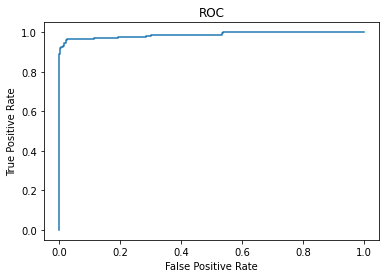

In [105]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [106]:
input1 = ['Submit AI Assignment']
input1_transform = vect.transform(input1)
print(mnb.predict(input1_transform))

[0]


In [107]:
#input2 = ['Will pick you at 7pm']
input2 =['Free entry in 2 a wkly comp to win cricket wrld cup final']
input2_transform = vect.transform(input2)
print(mnb.predict(input2_transform))

[1]


###3) Building and Cross-Validation of the Model for Multivariate NB

3.1) 5-fold cross-validation results in terms of accuracy.

In [108]:
start = time.time()
mvb=BernoulliNB()
#cross validtion
score2 = cross_val_score(mvb, X_train_transformed,y_train, cv=5, scoring='accuracy')
print("Average Cross Validation Accuracy for 5-Folds using Multivariate Naive Bayes:-",np.mean(score2))

Average Cross Validation Accuracy for 5-Folds using Multivariate Naive Bayes:- 0.9734395324184166


3.2) 10-fold cross-validation results in terms of precision, recall,and F-score

In [109]:
score2 = cvd(mvb, X_train_transformed,y_train, cv=10, scoring=scoring)
print("Average Cross Validation precision for 10-Folds using Multivariate Naive Bayes:-",score2['test_precision'].mean())
print("Average Cross Validation recall for 10-Folds using Multivariate Naive Bayes:-",score2['test_recall'].mean())
print("Average Cross Validation F1 score for 10-Folds using Multivariate Naive Bayes:-",score2['test_f1_score'].mean())

Average Cross Validation precision for 10-Folds using Multivariate Naive Bayes:- 0.9733145572019092
Average Cross Validation recall for 10-Folds using Multivariate Naive Bayes:- 0.857047791893527
Average Cross Validation F1 score for 10-Folds using Multivariate Naive Bayes:- 0.9104419163408396


3.3) Training Multivariate NB Model 

In [110]:
# fit
mvb.fit(X_train_transformed,y_train)

# predict class
y_pred_class2 = mvb.predict(X_test_transformed)

# predict probabilities
y_pred_proba2 = mvb.predict_proba(X_test_transformed)

#time taken for training and cross validation
end =time.time()
print("Time taken:-",end-start)

Time taken:- 0.17893671989440918


3.4) Model Evaluation

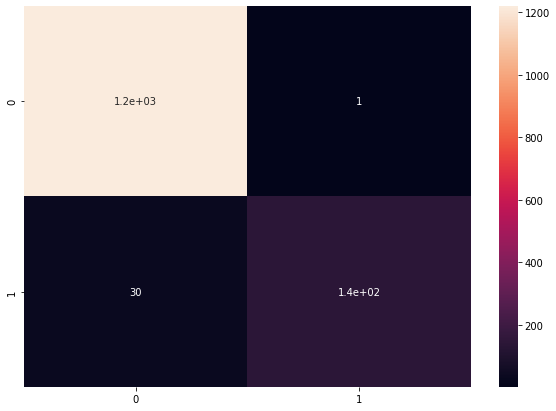

In [111]:
# confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred_class2)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [112]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class1))
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class1))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class1))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class1))

sensitivity 0.8265895953757225
specificity 0.9991803278688525
precision 0.9930555555555556
0.9636363636363636
precision 0.9930555555555556
PRECISION SCORE : 0.9636363636363636
RECALL SCORE : 0.9190751445086706
F1 SCORE : 0.9408284023668639


In [113]:
# creating an ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba2[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [114]:
# area under the curve
print (roc_auc)

0.9928740642471334


In [115]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.277457,0.000000
2,1.000000e+00,0.323699,0.000000
3,1.000000e+00,0.358382,0.000000
4,1.000000e+00,0.369942,0.000000
...,...,...,...
109,7.616407e-13,1.000000,0.914754
110,7.290602e-13,1.000000,0.918852
111,4.953348e-13,1.000000,0.928689
112,4.784730e-13,1.000000,0.930328


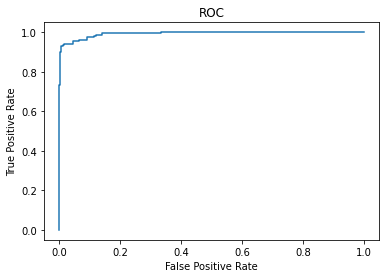

In [116]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [117]:
input1 = ['Submit AI Assignment']
input1_transform = vect.transform(input1)
print(mvb.predict(input1_transform))

[0]


In [118]:
#input2 = ['Will pick you at 7pm']
input2 =['Free entry in 2 a wkly comp to win cricket Cup final']
input2_transform = vect.transform(input2)
print(mvb.predict(input2_transform))

[1]
